In [1]:
import requests
import base64

# Replace with your own Client ID and Client Secret
CLIENT_ID = 'e02a86eadf2f471e99d9ff6fc3def86b'
CLIENT_SECRET = 'fb7cc949144b42e994a13e4feafceee4'

# Base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


In [2]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


## Creating DataFrame

In [3]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

def get_playlist_data(playlist_id, access_token):
    # Set up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # Add more attributes as needed
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

## Creating dataset from Playlists

https://developer.spotify.com/documentation/web-api/concepts/rate-limits

In [4]:
playlist_id = '64S8206Y2KJa2TzJCtPvf3' #Playlist 5 (Mix)
# Call the function to get the music data from the playlist and store it in a DataFrame
df1 = get_playlist_data(playlist_id, access_token)

playlist_id = '2XSpDIQ00elpbAifqSy8DC' #Playlist 2 (Metal)
df2 = get_playlist_data(playlist_id, access_token)

playlist_id = '3d2dL3wtLq8g3XiXKEn080' #Playlist 1 (Bangla)
df3 = get_playlist_data(playlist_id, access_token)

playlist_id = '71ALIJSdid4u92eDf4zhYQ' #Playlist 4 (HipHop)
df4 = get_playlist_data(playlist_id, access_token)

playlist_id = '5ABHKGoOzxkaa28ttQV9sE' # Top 100 most streamed songs on Spotify: https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE
df5 = get_playlist_data(playlist_id, access_token)

music_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True, sort=False)

# Display the DataFrame
# print(music_df)

In [5]:
# Save the fetched data to a CSV file
music_df.to_csv('spotify_playlist_data.csv', index=False)
print("Spotify playlist data saved to 'spotify_playlist_data.csv'.")

Spotify playlist data saved to 'spotify_playlist_data.csv'.


In [6]:
music_df.head(555)

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1-800-273-8255,"Logic, Alessia Cara, Khalid",Everybody,1HiN2YXZcc3EjmVZ4WjfBk,5tz69p7tJuGPeMGwNTxYuV,73,2017-05-05,250173,True,https://open.spotify.com/track/5tz69p7tJuGPeMG...,...,0.574,5,-7.788,0,0.0479,0.569000,0.000000,0.1900,0.357,100.023
1,survivin',Bastille,survivin',3aFhgv33grS5tIxAUqwtBC,1lwvJQGhdq6Kyr4BBquf23,49,2020-09-22,173206,False,https://open.spotify.com/track/1lwvJQGhdq6Kyr4...,...,0.780,7,-5.023,1,0.1290,0.250000,0.000000,0.0908,0.680,95.035
2,Gotta Be A Reason,Alec Benjamin,Narrated For You,6jKZplJpy21R5lHaYHHjmZ,0IrtQ83z9jylZaLEJK2eoy,54,2018-11-16,210354,False,https://open.spotify.com/track/0IrtQ83z9jylZaL...,...,0.518,4,-7.582,0,0.0404,0.806000,0.000025,0.1040,0.277,79.997
3,Under Pressure,"Queen, David Bowie",Hot Space,19HKPNkfGggYUnvdKHGTKJ,7rgZTzcjofQJY5kz9FO3OS,49,1982-05-03,246907,False,https://open.spotify.com/track/7rgZTzcjofQJY5k...,...,0.526,2,-12.745,1,0.0522,0.387000,0.000000,0.0879,0.452,113.453
4,The Pretender,Foo Fighters,"Echoes, Silence, Patience & Grace",3ilXDEG0xiajK8AbqboeJz,7x8dCjCr0x6x2lXKujYD34,78,2007-09-25,269373,False,https://open.spotify.com/track/7x8dCjCr0x6x2lX...,...,0.959,9,-4.040,1,0.0431,0.000917,0.000000,0.0280,0.365,172.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,In the End,Linkin Park,Hybrid Theory (Bonus Edition),6hPkbAV3ZXpGZBGUvL6jVM,60a0Rd6pjrkxjPbaKzXjfq,87,2000,216880,False,https://open.spotify.com/track/60a0Rd6pjrkxjPb...,...,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143
496,Flowers,Miley Cyrus,Endless Summer Vacation,5DvJgsMLbaR1HmAI6VhfcQ,7DSAEUvxU8FajXtRloy8M0,90,2023-08-18,200600,False,https://open.spotify.com/track/7DSAEUvxU8FajXt...,...,0.691,0,-4.775,1,0.0633,0.058400,0.000070,0.0232,0.632,118.048
497,Cuidado,Sophia Treadway,Cuidado,6YCqciyc3cT72TTIddvULV,7miLbD9XU1SOhXxbZPv7dR,40,2024-05-01,179598,False,https://open.spotify.com/track/7miLbD9XU1SOhXx...,...,0.684,5,-6.322,0,0.0798,0.052000,0.000000,0.2510,0.845,94.011
498,Smells Like Teen Spirit,Nirvana,Nevermind (Remastered),2UJcKiJxNryhL050F5Z1Fk,4CeeEOM32jQcH3eN9Q2dGj,82,1991-09-26,301920,False,https://open.spotify.com/track/4CeeEOM32jQcH3e...,...,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761


In [7]:
print(music_df.isnull().sum())

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64


## Dataset plots

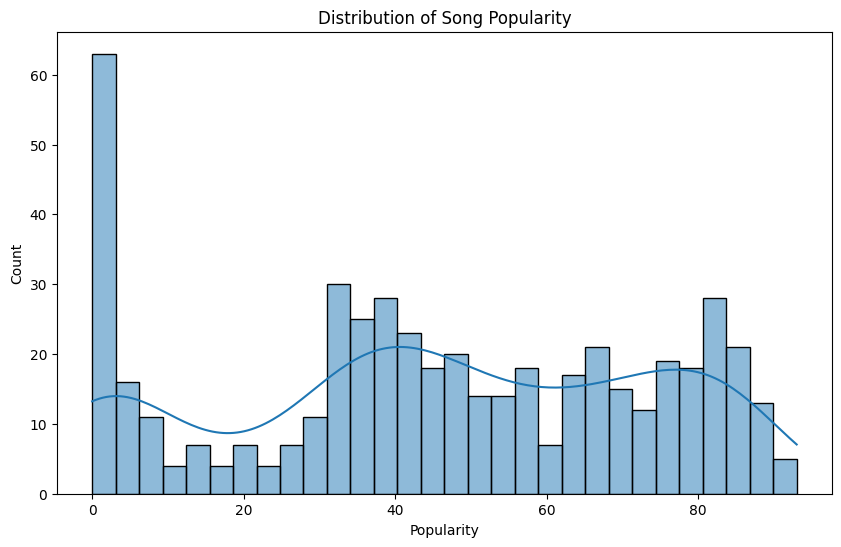

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `tracks` is a DataFrame containing the track metadata and audio features
tracks = pd.read_csv('spotify_playlist_data.csv')  # replace with actual path to the dataset

# Plotting the distribution of song popularity
plt.figure(figsize=(10, 6))
sns.histplot(tracks['Popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


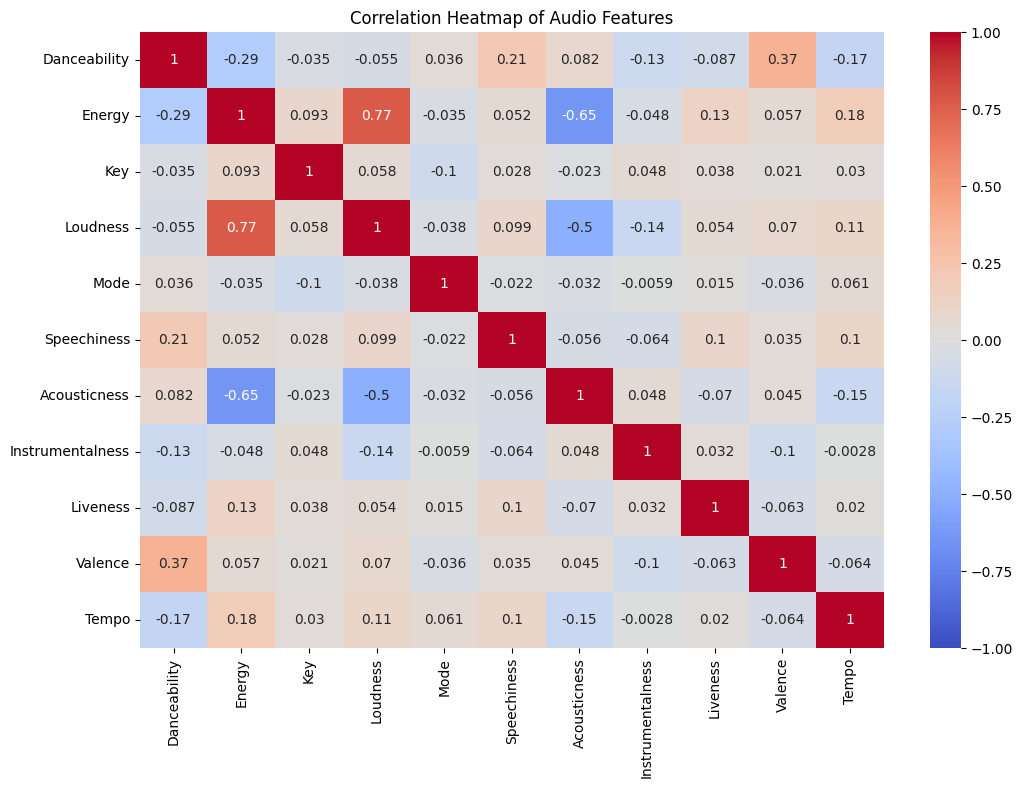

In [5]:
# Select audio features columns
audio_features = tracks[['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

# Compute correlation matrix
corr_matrix = audio_features.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

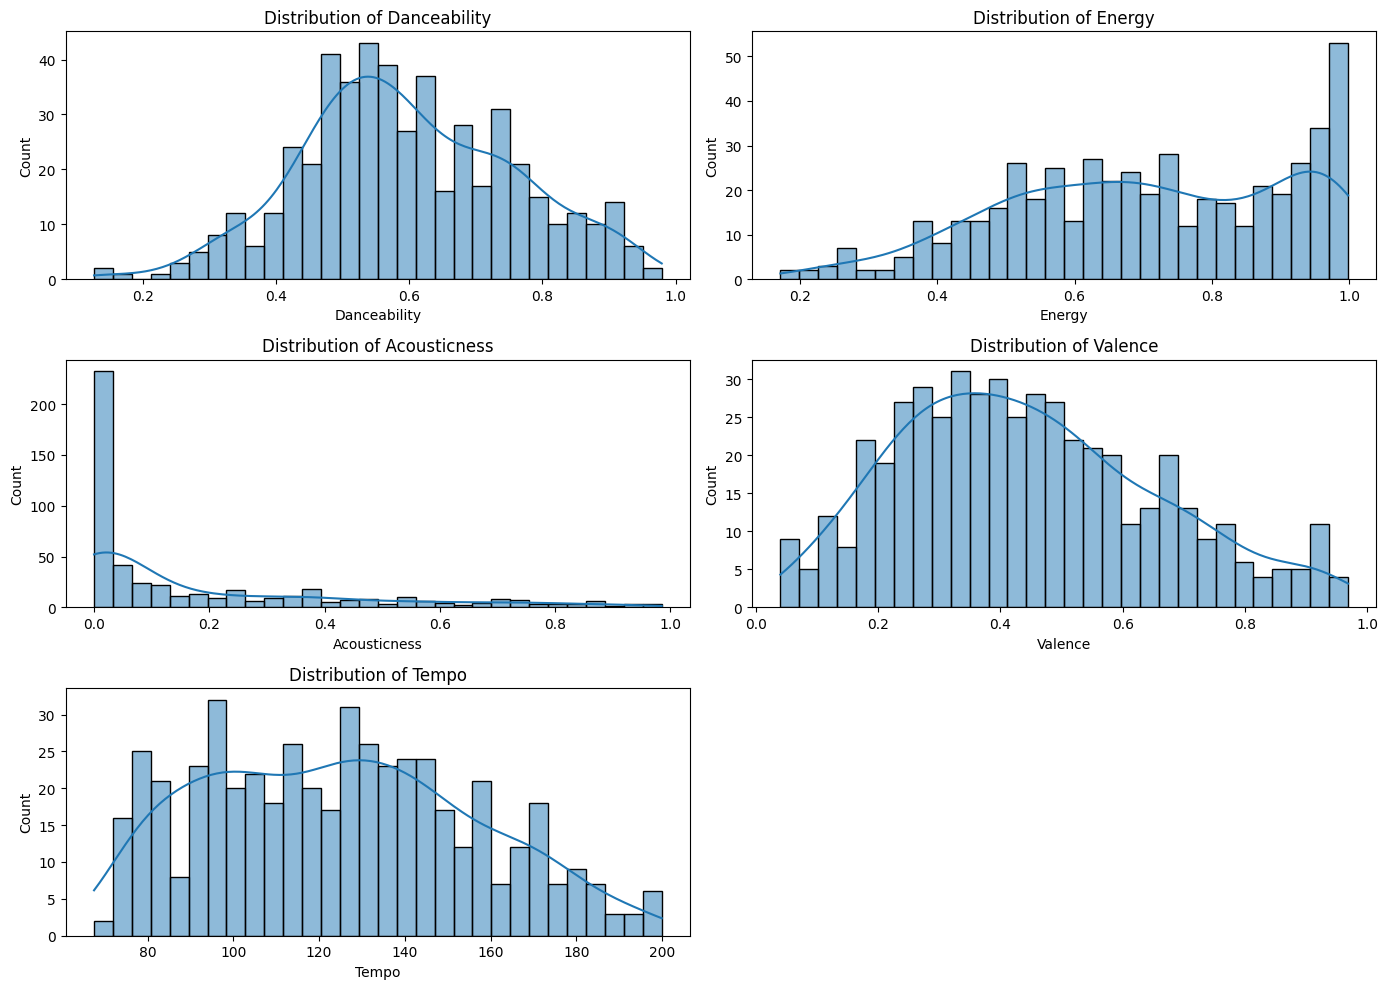

In [6]:
# Plotting distributions of some selected audio features
features_to_plot = ['Danceability', 'Energy', 'Acousticness', 'Valence', 'Tempo']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(tracks[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Tunning Features for Recommendations

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

data = music_df

In [11]:
# Function to calculate weighted popularity scores based on release date
def calculate_weighted_popularity(release_date):
    # Convert the release date to datetime object
    release_date = datetime.strptime(release_date, '%Y-%m-%d')

    # Calculate the time span between release date and today's date
    time_span = datetime.now() - release_date

    # Calculate the weighted popularity score based on time span (e.g., more recent releases have higher weight)
    weight = 1 / (time_span.days + 1)
    return weight

In [12]:
# Normalize the music features using Min-Max scaling
scaler = MinMaxScaler()
music_features = music_df[['Danceability', 'Energy', 'Key', 
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)

### Content Based

In [15]:
# a function to get content-based recommendations based on music features
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = music_df[music_df['Track Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = music_df.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    # Remove the input song from the recommendations
    content_based_recommendations = content_based_recommendations[content_based_recommendations['Track Name'] != input_song_name]

    return content_based_recommendations

### Colaborative

### Hybrid

In [16]:
def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get content-based recommendations
    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    # Get the popularity score of the input song
    popularity_score = music_df.loc[music_df['Track Name'] == input_song_name, 'Popularity'].values[0]

    # Calculate the weighted popularity score
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0])

    # Create a DataFrame for the input song
    input_song_data = {
        'Track Name': [input_song_name],
        'Artists': [music_df.loc[music_df['Track Name'] == input_song_name, 'Artists'].values[0]],
        'Album Name': [music_df.loc[music_df['Track Name'] == input_song_name, 'Album Name'].values[0]],
        'Release Date': [music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0]],
        'Popularity': [weighted_popularity_score]
    }
    input_song_df = pd.DataFrame(input_song_data)

    # Concatenate the input song DataFrame with content-based recommendations
    hybrid_recommendations = pd.concat([content_based_rec, input_song_df], ignore_index=True)

    # Sort the hybrid recommendations based on weighted popularity score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remove the input song from the recommendations
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]

    return hybrid_recommendations

## Recommendation Song List

In [17]:
input_song_name = "Breaking the Habit"

cb_recommendations = content_based_recommendations(input_song_name, num_recommendations=10)
print(f"Content based recommended songs for '{input_song_name}':\n")
print(cb_recommendations.to_string(index=False))

print("\n \n")

h_recommendations = hybrid_recommendations(input_song_name, num_recommendations=10)
print(f"Hybrid recommended songs for '{input_song_name}':\n")
print(h_recommendations.to_string(index=False))

Content based recommended songs for 'Breaking the Habit':

               Track Name                 Artists                                                        Album Name Release Date  Popularity
              Last Resort              Papa Roach                                                            Infest   2001-04-25          81
    Weight Beneath My Sin Five Finger Death Punch The Wrong Side Of Heaven And The Righteous Side Of Hell, Volume 2   2013-11-18          36
        Bottom of The Top Five Finger Death Punch                                                                F8   2020-02-28          43
               In the End             Linkin Park                                     Hybrid Theory (Bonus Edition)         2000          87
               In the End             Linkin Park                                     Hybrid Theory (Bonus Edition)         2000          87
          CASTLE OF GLASS             Linkin Park                                              

In [ ]:
## Save Recommendation Song List

In [18]:
import json

# Convert DataFrames to dictionaries
cb_recommendations_dict = cb_recommendations.to_dict(orient="records")
h_recommendations_dict = h_recommendations.to_dict(orient="records")

# Specify file paths
cb_file_path = "cb_recommendations.json"
h_file_path = "h_recommendations.json"

# Write CB recommendations to JSON file
with open(cb_file_path, "w") as json_file:
    json.dump(cb_recommendations_dict, json_file, indent=4)

# Write Hybrid recommendations to JSON file
with open(h_file_path, "w") as json_file:
    json.dump(h_recommendations_dict, json_file, indent=4)

print("Recommendations saved to JSON files successfully.")


Recommendations saved to JSON files successfully.
